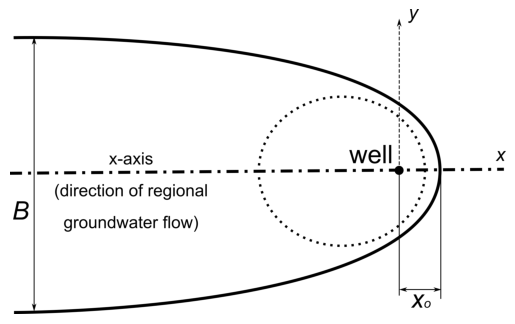

In [1]:
import matplotlib.pyplot as plt    
image = plt.imread('E:/15_REPOS/00_BETAMI/bin/Figure/well_catch.png'); fig, ax = plt.subplots() ; ax.imshow(image) ; ax.axis('off') ; plt.show() 

# Well capture zone

**General information**

The well capture zone is a hypothetical delineation within an aquifer that marks groundwater that ultimately reaches the well, also referred to as the zone of contribution.
Therefore, in the case of groundwater contamination, any contamination encountered within a well capture zone will ultimately reach the water supply well. This is conceptually presented in the figure below.


**Idealized situation**


The notebook provide the basic functionality to compute the catchment area for a pumping well in a confined, homogeneous, and isotropic aquifer. Users can visualize the results and modify the parameters of the computation to gain system understanding.

The theoretical fundation for the computation can be found in a publication from <a href="https://ngwa.onlinelibrary.wiley.com/doi/10.1111/j.1745-6584.1993.tb00824.x" target="_blank">Grubb (1993)</a>. The analysis consider an confined, homogeneous, and isotropic aquifer. The regional groundwater flow is directed along teh _x_-axis and described by the hydraulic gradient _i_. The situation is illustrated by Figure 1.

Accordingly, the catchment area of a ideal pumping well, situated at the coordinates (0,0) can be characterized by:
* the culmination point $x_0$ and
* the width $B$ of the stream divide.

$x_0 = -\frac{Q}{2\pi Kib}$

$B = 2y_{max} = \frac{Q}{Kib}$

Each point of the stream divide can be calculated as:

$x = \frac{-y}{tan(\frac{2\pi K i b y}{Q})}$

**Computation and visualization**

Subsequently, the solution is computed and results are visualized. You can modify the parameters to investigate the functional behavior. You can modify
* the hydraulic conductivity _K_ (in m/s),
* the pumping rate _Q_ (in m3/s),
* the regional hydraulic gradient of groundwater flow _i_, 
* and the aquifer thickness _b_ (in m).

Further modifications are intended to re-shape and format the plot. Below the plot, the notebook provides the calculated values for the culmination point $x_o$ and the width $B$ of the catchment area.


In [ ]:
# Initialize librarys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from ipywidgets import *
from math import pi, tan

# Function for catchment width (maximale Breite des Einzugsgebietes)
def ymax_conf(Q, K, i, b):
    ymax = Q/(2.*K*i*b)
    return ymax

# Function for the culmination point (Kulminationspunkt)
def x0_conf(Q, K, i, b):
    x0 = -Q/(2.*np.pi*K*i*b)
    return x0

# Computaton of the well catchment (Berechnung der Trennstromlinie)
def TSL_conf(x_max, K, Q, i, b, x_point, y_point, x_scale, y_scale):
    ymax = 0.0
    ymax = ymax_conf(Q, K, i, b)
    x0   = x0_conf(Q, K, i, b)
    y = np.linspace(-ymax*0.999, ymax*0.999, 100)
    
    # Compute catchment
    x = -1*y/(np.tan(2*np.pi*K*i*b*y/Q))
    
    x_plot = 500 * x_scale
    y_plot = 1000 * y_scale
    
    # Plot
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(1, 1, 1)

    ax.plot(x,y, label='Stream divide')
    plt.plot(x_point,y_point, marker='o', color='r',linestyle ='None', label='marked point') 
    ax.set(xlabel='x (m)', ylabel='y (m)',title='Catchment area of a pumping well')
    ax.set(xlim=(10*x_plot,-x_plot), ylim=(-y_plot, y_plot))
    plt.fill_between(x,y,color='blue', alpha=.1)
    plt.fill_between(x,-y,color='blue', alpha=.1)
    ax.grid()
    plt.legend()
    plt.show()
    
    print("y_max: %5.2f" %ymax)
    print('x_0:  %5.2f' %x0)
    
    
x_max = 1000      # Internal parameter to define the number range
Q = 4320 / 86400  # Abstraction rate, in meters and seconds
K = 457.5 / 86400 # hydraulic conductivity in m und sec   
i = 0.003         # Regional gradient of groundwater flow
b = 23            # Thickness of the homogeneous and isotropic aquifer

interact(TSL_conf,
         x_max=fixed(x_max),
         Q=widgets.FloatText        (value=Q, min = 0.001, max = 1, step = 0.01),
         K=widgets.FloatLogSlider   (value=K,base=10,min=-6, max=-1, step=0.01,readout=True,readout_format='.2e'),
         i=widgets.FloatText        (value=i,min = 0.0001, max=0.1, step=0.001,readout=True,readout_format='e'),
         b=widgets.FloatText        (value=b,min = 1,max = 200, step = 1),
         x_scale = widgets.FloatText(value=0.3,min = 0.1,max = 10, step = 0.1),
         y_scale = widgets.FloatText(value=0.3,min = 0.1,max = 10, step = 0.1),
         x_point= widgets.FloatText (value=0, step=10),
         y_point= widgets.FloatText (value=0,step=10))

<br>Developed by: Thomas.Reimann@tu-dresden.de
<br>Last change: 2023 12 06

<hr>
&copy; 2023 | Thomas Reimann
<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img style="float: right" alt="Creative Commons Lizenzvertrag" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>